# Stock Prediction model with RNN

Here we will approach in 3 different ways.  
1) Predict stock price.   
2) Predict future stock returns.    
3) Predict whether stock is going up or down.  

In [1]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# - Stock Price Prediction model

## Step 1: Load the data

In [2]:
df = pd.read_csv('./AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,1885.880005,1887.109985,1858.550049,1869.439941,1869.439941,3440900
1,2020-01-15,1872.250000,1878.859985,1855.089966,1862.020020,1862.020020,2896600
2,2020-01-16,1882.989990,1885.589966,1866.020020,1877.939941,1877.939941,2659500
3,2020-01-17,1885.890015,1886.640015,1857.250000,1864.719971,1864.719971,3997300
4,2020-01-21,1865.000000,1894.270020,1860.000000,1892.000000,1892.000000,3707800


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500
249,2021-01-08,3180.000000,3190.639893,3142.199951,3182.699951,3182.699951,3537700
250,2021-01-11,3148.010010,3156.379883,3110.000000,3114.209961,3114.209961,3683400
251,2021-01-12,3120.000000,3142.139893,3086.000000,3120.830078,3120.830078,3514600
252,2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3313000


In [4]:
series = df['Close'].values.reshape(-1,1)
print(series.shape, type(series))

(253, 1) <class 'numpy.ndarray'>


In [5]:
series = df['Close'].values.reshape(-1,1)
print(series.shape, type(series))
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])  #<- use the first half of datas to find mean and variance.  
series = scaler.transform(series).flatten()
print(series.shape)

(253, 1) <class 'numpy.ndarray'>
(253,)


In [6]:
T = 10 
D = 1 
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [7]:
print(X.shape, Y.shape)

(243, 10) (243,)


In [8]:
X = X.reshape(-1, T, 1)
print(X.shape)

(243, 10, 1)


## Step 2: Build the model

In [9]:
i = Input(shape = (T,D))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr=0.01))

In [10]:
N = len(X)

## Step 3: Train

In [11]:
r = model.fit(X[:-N//2], Y[:-N//2],   epochs=200, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/200
4/4 [==============================] - 1s 262ms/step - loss: 1.2405 - val_loss: 5.7237
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7660 - val_loss: 3.6575
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4696 - val_loss: 2.4527
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 0.2589 - val_loss: 1.6017
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1506 - val_loss: 1.0046
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1077 - val_loss: 0.6246
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0985 - val_loss: 0.3657
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0873 - val_loss: 0.2299
Epoch 9/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0743 - val_loss: 0.1538
Epoch 10/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0640 - val_loss: 0.1130
Epoch 11/200
4/4 [

Epoch 84/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0272 - val_loss: 0.0677
Epoch 85/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0273 - val_loss: 0.0648
Epoch 86/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0267 - val_loss: 0.0683
Epoch 87/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0268 - val_loss: 0.0677
Epoch 88/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0696
Epoch 89/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0268 - val_loss: 0.0680
Epoch 90/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0268 - val_loss: 0.0705
Epoch 91/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0265 - val_loss: 0.0647
Epoch 92/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0266 - val_loss: 0.0661
Epoch 93/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0630
Epoch 94/2

Epoch 166/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0255 - val_loss: 0.0661
Epoch 167/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0249 - val_loss: 0.0623
Epoch 168/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0254 - val_loss: 0.0622
Epoch 169/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0252 - val_loss: 0.0613
Epoch 170/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0260 - val_loss: 0.0655
Epoch 171/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0255 - val_loss: 0.0580
Epoch 172/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0258 - val_loss: 0.0652
Epoch 173/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0252 - val_loss: 0.0670
Epoch 174/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0251 - val_loss: 0.0644
Epoch 175/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0255 - val_loss: 0.0642


## Step 4: Evaluate

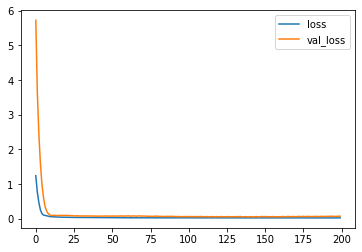

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Step 5: Prediction

In [13]:
p = model.predict(X)

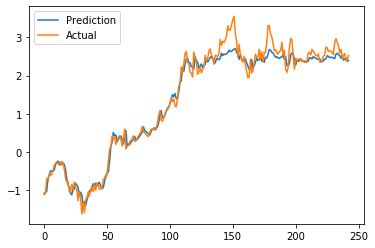

In [14]:
plt.plot(p[:,0], label ='Prediction')
plt.plot(Y, label = 'Actual')
plt.legend()
plt.show()

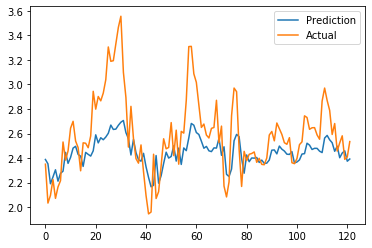

In [15]:
plt.plot(p[:,0][-N//2:], label ='Prediction')
plt.plot(Y[-N//2:], label = 'Actual')
plt.legend()
plt.show()

This might look ok, but actually one step forecasting is to mimic its last value.

#### Let's run mutiple-step forecast

In [16]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

for i in range(len(X)-len(validation_target)):
    p = model.predict(last_x.reshape(-1,10,1))[0][0]
    validation_predictions.append(p)
    last_x = np.roll(last_x , -1)
    last_x[-1] = p
    
validation_predictions = np.array(validation_predictions)

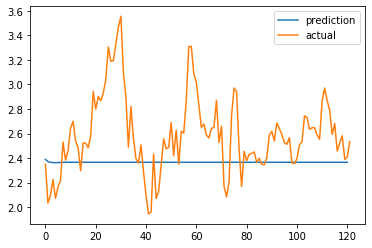

In [17]:
plt.plot(validation_predictions, label = 'prediction')
plt.plot(validation_target, label = 'actual')
plt.legend()
plt.show()

The performance is worse.  

# -Stock return prediction

Stock return is defiend by $$ R = \frac{V_{close} - V_{previous\_close}}{V_{previous\_close}} $$

## Step 1: Load the data

We need to make a new column of stock return.

In [18]:
df['Prev_Close'] = df['Close'].shift(1)
df['Return'] = (df['Close'] - df['Prev_Close'])/df['Prev_Close']

In [19]:
series = df['Return'].values[1:]
series = series.reshape(-1,1) #<- need this step to input in scaler.fit

In [20]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [21]:
X = []
Y = []
T = 10 

for i in range(len(series) - T):
    x = series[i:i+T]
    y = series[i+T]
    X.append(x)
    Y.append(y) 

X = np.array(X)
Y = np.array(Y)

In [22]:
print(X.shape, Y.shape)

(242, 10) (242,)


In [23]:
X = X.reshape(-1,10,1)
print(X.shape)

(242, 10, 1)


## Step 2: Build the model

In [24]:
i = Input(shape=(10,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr = 0.01))

## Step 3: Train the model

In [25]:
N = len(X)

r = model.fit(X[:N//2], Y[:N//2], epochs = 400, validation_data = (X[N//2:], Y[N//2:]))

Epoch 1/400
4/4 [==============================] - 1s 338ms/step - loss: 1.1408 - val_loss: 0.6847
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1088 - val_loss: 0.6718
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1031 - val_loss: 0.6729
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1006 - val_loss: 0.6725
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 1.0923 - val_loss: 0.6768
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0903 - val_loss: 0.6879
Epoch 7/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0868 - val_loss: 0.6932
Epoch 8/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0844 - val_loss: 0.6942
Epoch 9/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0843 - val_loss: 0.6878
Epoch 10/400
4/4 [==============================] - 0s 18ms/step - loss: 1.0788 - val_loss: 0.6883
Epoch 11/400
4/4 [=

Epoch 84/400
4/4 [==============================] - 0s 11ms/step - loss: 0.6001 - val_loss: 1.1744
Epoch 85/400
4/4 [==============================] - 0s 11ms/step - loss: 0.5993 - val_loss: 1.1010
Epoch 86/400
4/4 [==============================] - 0s 14ms/step - loss: 0.6023 - val_loss: 1.2235
Epoch 87/400
4/4 [==============================] - 0s 13ms/step - loss: 0.5870 - val_loss: 1.1094
Epoch 88/400
4/4 [==============================] - 0s 13ms/step - loss: 0.5965 - val_loss: 1.3047
Epoch 89/400
4/4 [==============================] - 0s 14ms/step - loss: 0.6041 - val_loss: 1.2027
Epoch 90/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5848 - val_loss: 1.1568
Epoch 91/400
4/4 [==============================] - 0s 10ms/step - loss: 0.5799 - val_loss: 1.3050
Epoch 92/400
4/4 [==============================] - 0s 9ms/step - loss: 0.5850 - val_loss: 1.1499
Epoch 93/400
4/4 [==============================] - 0s 14ms/step - loss: 0.5695 - val_loss: 1.2511
Epoch 94/40

Epoch 166/400
4/4 [==============================] - 0s 14ms/step - loss: 0.4106 - val_loss: 1.6400
Epoch 167/400
4/4 [==============================] - 0s 14ms/step - loss: 0.4088 - val_loss: 1.6919
Epoch 168/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4060 - val_loss: 1.6483
Epoch 169/400
4/4 [==============================] - 0s 10ms/step - loss: 0.4084 - val_loss: 1.7153
Epoch 170/400
4/4 [==============================] - 0s 14ms/step - loss: 0.4088 - val_loss: 1.6834
Epoch 171/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4115 - val_loss: 1.7483
Epoch 172/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4241 - val_loss: 1.6231
Epoch 173/400
4/4 [==============================] - 0s 12ms/step - loss: 0.4002 - val_loss: 1.7911
Epoch 174/400
4/4 [==============================] - 0s 20ms/step - loss: 0.4181 - val_loss: 1.6520
Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.4061 - val_loss: 1.6877


Epoch 248/400
4/4 [==============================] - 0s 15ms/step - loss: 0.2919 - val_loss: 2.1209
Epoch 249/400
4/4 [==============================] - 0s 15ms/step - loss: 0.3267 - val_loss: 2.1790
Epoch 250/400
4/4 [==============================] - 0s 12ms/step - loss: 0.2978 - val_loss: 2.3159
Epoch 251/400
4/4 [==============================] - 0s 14ms/step - loss: 0.2922 - val_loss: 2.0520
Epoch 252/400
4/4 [==============================] - ETA: 0s - loss: 0.352 - 0s 12ms/step - loss: 0.3139 - val_loss: 2.2815
Epoch 253/400
4/4 [==============================] - 0s 12ms/step - loss: 0.3244 - val_loss: 2.2381
Epoch 254/400
4/4 [==============================] - 0s 12ms/step - loss: 0.3654 - val_loss: 2.0312
Epoch 255/400
4/4 [==============================] - 0s 11ms/step - loss: 0.3726 - val_loss: 2.3824
Epoch 256/400
4/4 [==============================] - 0s 19ms/step - loss: 0.4266 - val_loss: 2.0844
Epoch 257/400
4/4 [==============================] - 0s 12ms/step - loss: 0.

4/4 [==============================] - 0s 11ms/step - loss: 0.2268 - val_loss: 2.6855
Epoch 330/400
4/4 [==============================] - 0s 21ms/step - loss: 0.2006 - val_loss: 2.5729
Epoch 331/400
4/4 [==============================] - 0s 13ms/step - loss: 0.1941 - val_loss: 2.5202
Epoch 332/400
4/4 [==============================] - 0s 13ms/step - loss: 0.1841 - val_loss: 2.5656
Epoch 333/400
4/4 [==============================] - 0s 12ms/step - loss: 0.1799 - val_loss: 2.5961
Epoch 334/400
4/4 [==============================] - 0s 11ms/step - loss: 0.1779 - val_loss: 2.6184
Epoch 335/400
4/4 [==============================] - 0s 11ms/step - loss: 0.1784 - val_loss: 2.6247
Epoch 336/400
4/4 [==============================] - 0s 24ms/step - loss: 0.1793 - val_loss: 2.5896
Epoch 337/400
4/4 [==============================] - 0s 15ms/step - loss: 0.1810 - val_loss: 2.5923
Epoch 338/400
4/4 [==============================] - 0s 12ms/step - loss: 0.1769 - val_loss: 2.6115
Epoch 339/400


## Step 4: Evaluate

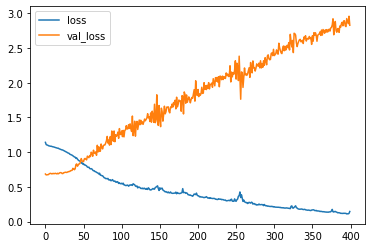

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

This model is clearly overfitting

## Step 5: Predict

Let's predict with one-step forecasting

In [27]:
p = model.predict(X)

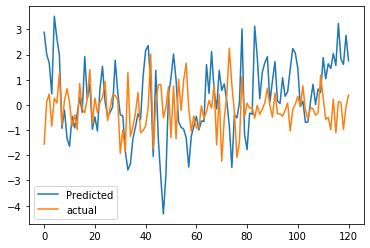

In [28]:
plt.plot(p[N//2:], label ='Predicted')
plt.plot(Y[N//2:], label ='actual')
plt.legend()
plt.show()

Let's predict with multi-step forecasting

In [29]:
validation_predictions = []
validation_target = Y[N//2:]

In [30]:
last_x = X[N//2:][0]
print(last_x.shape)

(10, 1)


In [31]:
for i in range(len(Y[N//2:])):
    p = model.predict(last_x.reshape(-1,10,1))[0][0]
    validation_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
validation_predictions = np.array(validation_predictions)    

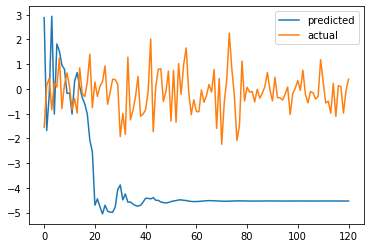

In [32]:
plt.plot(validation_predictions, label = 'predicted')
plt.plot(validation_target, label = 'actual')
plt.legend()
plt.show()

Not accurate at all

# - Stock prediction whether go or down

So now, this is a classification problem. 

## Step 1: Load the data

In [33]:
Y = []
N = len(df['Return'])

for i in range(N):
    if df['Return'][i] >= 0:
        Y.append(1)
    else:
        Y.append(0)
Y = np.array(Y)

In [34]:
input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
target = Y

In [35]:
print(input_data.shape, target.shape)

(253, 5) (253,)


In [36]:
Ntrain = N // 3 * 2

scaler = StandardScaler()
scaler.fit(input_data[:Ntrain]) 
input_data = scaler.transform(input_data)

In [37]:
X = []
Y = []
T = 10 

for i in range(N - T):
    x = input_data[i:i+T]
    y = target[i+T]
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [38]:
print(X.shape, Y.shape)

(243, 10, 5) (243,)


In [39]:
X_train = X[:Ntrain]
Y_train = Y[:Ntrain]
X_test = X[Ntrain:]
Y_test = Y[Ntrain:]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(168, 10, 5) (168,) (75, 10, 5) (75,)


## Step 2: Build the model

In [40]:
i = Input(shape=(10, 5))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.01), metrics = ['accuracy'])

## Step 3: Train

In [41]:
r = model.fit(X_train, Y_train, epochs = 200, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/200
6/6 [==============================] - 1s 219ms/step - loss: 0.7230 - accuracy: 0.4821 - val_loss: 0.6964 - val_accuracy: 0.4933
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.6847 - accuracy: 0.5893 - val_loss: 0.6901 - val_accuracy: 0.5733
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6740 - accuracy: 0.6012 - val_loss: 0.6995 - val_accuracy: 0.5200
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6725 - accuracy: 0.5833 - val_loss: 0.7030 - val_accuracy: 0.5200
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6663 - accuracy: 0.5893 - val_loss: 0.6941 - val_accuracy: 0.6000
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6702 - accuracy: 0.6012 - val_loss: 0.6989 - val_accuracy: 0.4800
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 0.6667 - accuracy: 0.5893 - val_loss: 0.6977 - val_accuracy: 0.4400
Epoch 8/200
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.1430 - accuracy: 0.9286 - val_loss: 1.9804 - val_accuracy: 0.5333
Epoch 60/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1277 - accuracy: 0.9524 - val_loss: 1.9992 - val_accuracy: 0.4933
Epoch 61/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1482 - accuracy: 0.9643 - val_loss: 2.0384 - val_accuracy: 0.5333
Epoch 62/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1736 - accuracy: 0.9286 - val_loss: 2.1374 - val_accuracy: 0.5333
Epoch 63/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2882 - accuracy: 0.8690 - val_loss: 1.7370 - val_accuracy: 0.5333
Epoch 64/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2355 - accuracy: 0.8988 - val_loss: 2.1123 - val_accuracy: 0.4933
Epoch 65/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2517 - accuracy: 0.8869 - val_loss: 1.8927 - val_accuracy: 0.5200
Epoch 66/200
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.0392 - accuracy: 0.9821 - val_loss: 2.0559 - val_accuracy: 0.4267
Epoch 118/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9821 - val_loss: 2.0904 - val_accuracy: 0.4133
Epoch 119/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 2.1214 - val_accuracy: 0.4133
Epoch 120/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9881 - val_loss: 2.1311 - val_accuracy: 0.4400
Epoch 121/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0310 - accuracy: 0.9821 - val_loss: 2.1617 - val_accuracy: 0.4133
Epoch 122/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0233 - accuracy: 0.9940 - val_loss: 2.1866 - val_accuracy: 0.4133
Epoch 123/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 0.9881 - val_loss: 2.2050 - val_accuracy: 0.4133
Epoch 124/200
6/6 [===

Epoch 175/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6180 - val_accuracy: 0.4133
Epoch 176/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6213 - val_accuracy: 0.4133
Epoch 177/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6242 - val_accuracy: 0.4133
Epoch 178/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6298 - val_accuracy: 0.4133
Epoch 179/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6285 - val_accuracy: 0.4267
Epoch 180/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6276 - val_accuracy: 0.4267
Epoch 181/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6327 - val_accuracy: 0.4267
Epoch 1

## Step 4: Evaluate

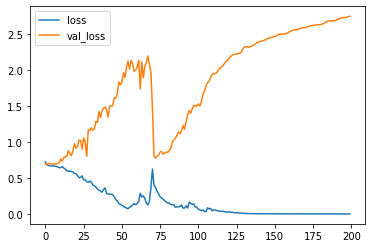

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

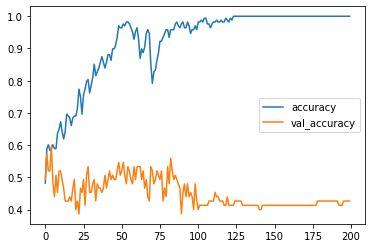

In [43]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 5: Prediction

Prediction wouldn't be necessary since the model is badly overfitting.  Validation accuracy is about 50%, which is equivalent to random guessing.  

# - Conclusion

Predicting a stock value from previous stock prices is an absurd idea.  The price of stock is determined by the buyer's psychology, not by previous record of stock prices.  Be careful if anyone says they can predict stock price by RNN model.  